# Comparison between Volkswagen and Daimler
The purpose of this project will be to compare the performance of Volkswagen AG and Daimler AG. To make the comparison we will look at three different key performance measurements: Ebit Margin, Return on Assets, and Return on Equity. The data that has been used was gathered from Whartons Research Data Services [Click here](https://wrds-web.wharton.upenn.edu/wrds//ds/compd/gfunda/index.cfm?queryID=980840). 

The results (graphs) will be found in the folder **Project Results** which is available in the repository. 

In [1]:
import pandas as pd #will be used for data-handling
import matplotlib.pyplot as plt #will be used for plotting
import numpy as np #will be used for a calculation later on

#import data from Wharton into a variable 
car_data = pd.read_excel('data_daimler_volkswagen.xlsx', index_col = 5)

#This is what the top of our data file looks like. 
car_data.head()
#We got some columns that we do not nead, so the next step will be to clean it up.


,Global Company Key,Industry Format,Data Format,Level of Consolidation - Company Annual Descriptor,Population Source,Data Date,Assets - Total,Earnings Before Interest,Income Before Extraordinary Items,Revenue - Total,Stockholders Equity - Parent,International Security Identification Number,Company Name,Active/Inactive Status Marker,Current ISO Country Code - Incorporation
Data Year - Fiscal,,,,,,,,,,,,,,,
2000,17828,INDL,HIST_STD,C,I,20001231,199274,17778.0,2465,162384,42409,DE0007100000,DAIMLER AG,A,DEU
2001,17828,INDL,HIST_STD,C,I,20011231,207410,12984.0,-662,152873,39004,DE0007100000,DAIMLER AG,A,DEU
2002,17828,INDL,HIST_STD,C,I,20021231,187327,17655.0,4877,149583,34914,DE0007100000,DAIMLER AG,A,DEU
2003,17828,INDL,HIST_STD,C,I,20031231,178268,15480.0,-418,136437,34481,DE0007100000,DAIMLER AG,A,DEU
2004,17828,INDL,HIST_STD,C,I,20041231,182696,15775.0,2466,142059,33541,DE0007100000,DAIMLER AG,A,DEU


In [2]:
#The number of the columns we do not want is indexed by the numbers in "loop_list"
loop_list = [0,1,2,3,4,5,11,13,14]
for i in car_data.columns[loop_list]:
    del car_data[i]

#We will also change the name of the columns so that the dataframe will be easier to work with. 
#To do this we use a dictionary
car_data = car_data.rename({"Data Year - Fiscal": "Fiscal Year",'Assets - Total': 'Total Assets', 'Earnings Before Interest': 'EBIT', 
                            'Income Before Extraordinary Items': 'Income', 'Revenue - Total': 'Total Revenue', 'Stockholders Equity - Parent': 
                            'Stockholders Equity'}, axis='columns')

#The data now looks like this
car_data.head()


,Total Assets,EBIT,Income,Total Revenue,Stockholders Equity,Company Name
Data Year - Fiscal,,,,,,
2000,199274,17778.0,2465,162384,42409,DAIMLER AG
2001,207410,12984.0,-662,152873,39004,DAIMLER AG
2002,187327,17655.0,4877,149583,34914,DAIMLER AG
2003,178268,15480.0,-418,136437,34481,DAIMLER AG
2004,182696,15775.0,2466,142059,33541,DAIMLER AG


In [3]:
#Split the data 
daimler_data = car_data[0:18]
volkswagen_data = car_data[18:36]

#Becuase of the method of splitting the dataframe there might be some issues with the indexing. 
#But, as our use will not have any problem with the indexing we remove the warning message which otherwise pops up.
pd.options.mode.chained_assignment = None 

#Now we need to calculate the key preformance measurement. 
#We create new columns for the numbers
daimler_data["EBIT Margin"] = daimler_data["EBIT"]/daimler_data["Total Revenue"]
daimler_data["ROA"] = daimler_data["Income"]/daimler_data["Total Assets"]
daimler_data["ROE"] = daimler_data["Income"]/daimler_data["Stockholders Equity"]

#now we do the same for volkswagen
volkswagen_data['EBIT Margin'] = volkswagen_data['EBIT'] / volkswagen_data['Total Revenue']
volkswagen_data['ROA'] = volkswagen_data['Income'] / volkswagen_data['Total Assets']
volkswagen_data['ROE'] = volkswagen_data['Income'] / volkswagen_data['Stockholders Equity']

#we have two different sets of the dataframe now so we can index our time series properly
#we do this by selecting a period range for the two data sets
dates_daimler = pd.period_range(start='2000', end='2017', freq='Y', name='Yearly Frequence')
daimler_data.index = dates_daimler

dates_volkswagen = pd.period_range(start='2000', end='2017', freq='Y', name='Yearly Frequence')
volkswagen_data.index = dates_volkswagen

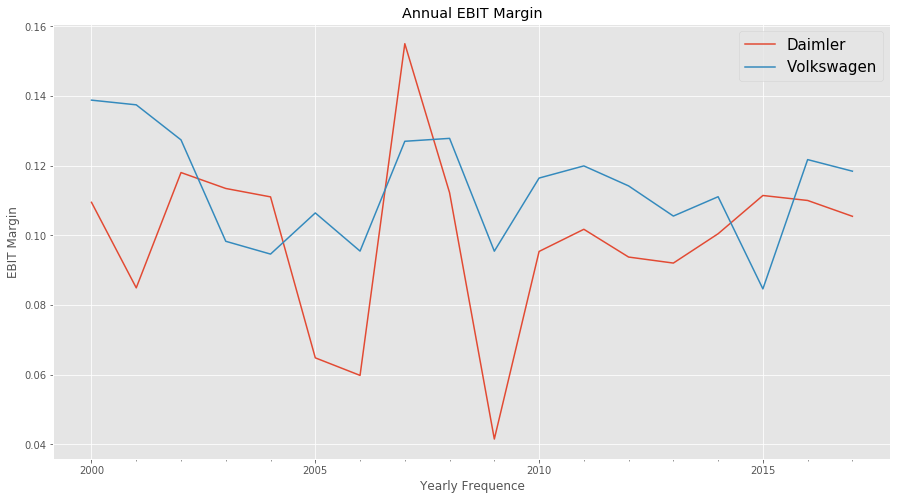

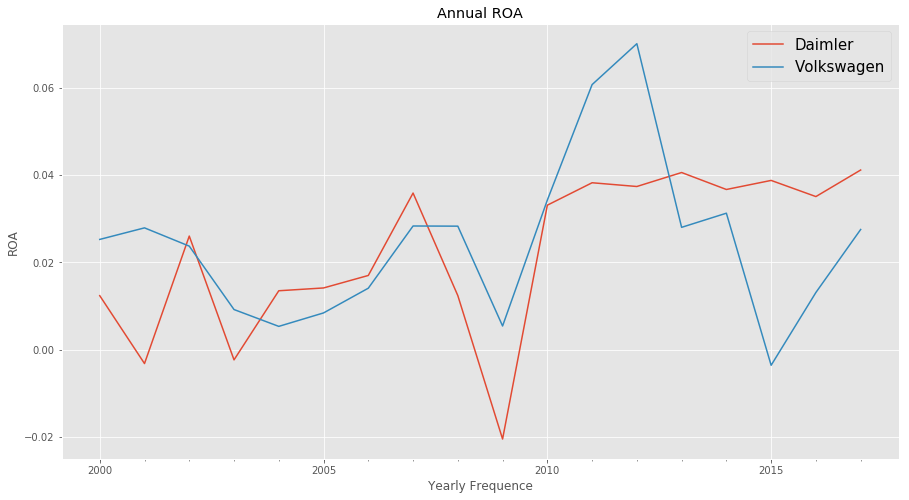

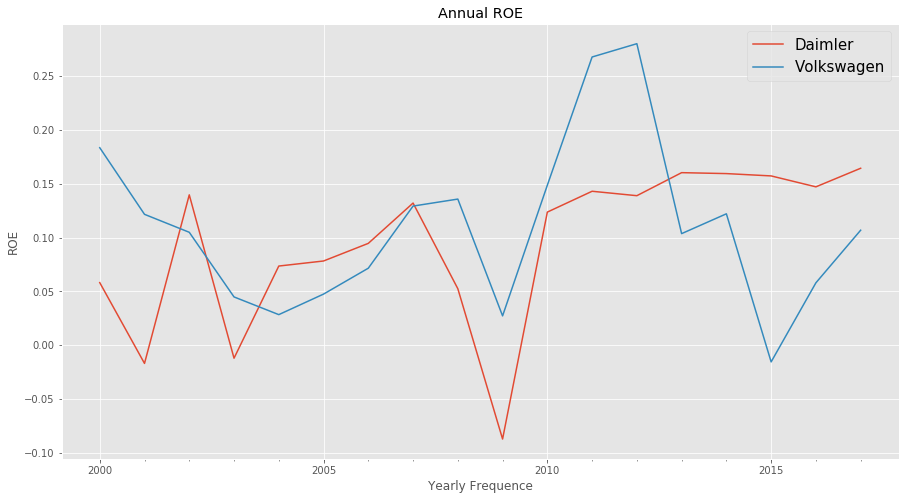

In [5]:
#Now we want to use our two dataframes to create the graphs for the key performance measurements 
plt.style.use("ggplot")

def plotting(Value): 
    fig = plt.figure()
    daimler_data[Value].plot(label = "Daimler", legend = True)
    volkswagen_data[Value].plot(label = 'Volkswagen', legend = True)
    plt.ylabel(Value)
    plt.rcParams['figure.figsize'] = [15,8]
    plt.legend(loc=1, prop={'size': 15})
    plt.title("Annual " + Value)
    fig.savefig("Project Results/" + Value + ".png") #Saving the plots to Project Results

#Now when we have our function we will do a loop to create our graphs and then save them in the folder Project Results
a = ["EBIT Margin","ROA","ROE"]
for i in a:
    plotting(i)
    

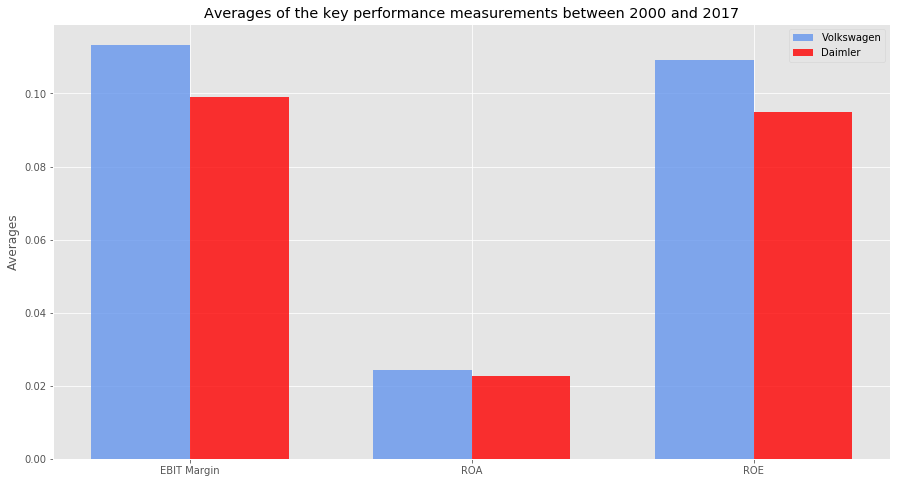

In [6]:
#Now we would also like to see the averages for the different companies

for i in a:
    volkswagen_mean = volkswagen_data[a].mean()
    daimler_mean = daimler_data[a].mean()

n_groups = 3 #Three different measurements
fig = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
volkswagen = plt.bar(index, volkswagen_mean, bar_width,
                 alpha=opacity,
                 color='cornflowerblue',
                label = 'Volkswagen')
 
daimler = plt.bar(index + bar_width,daimler_mean , bar_width,
                 alpha=opacity,
                 color='r',
                 label = 'Daimler')
plt.rcParams['figure.figsize'] = [15,8]
plt.legend()
plt.xticks(index + 0.5*bar_width, (a))
plt.ylabel("Averages")
plt.title("Averages of the key performance measurements between 2000 and 2017")
plt.savefig("Project Results/BarPlot.png")
plt.show()


# Results 

As we can see in the graphs Volkswagen is outperforming Daimler in all the measured areas. If we look at the graphs of the seperate measurements we can see that the companies perfrom differently depending on the period. For example, after the financial crisis in 2008 we can see a dip for both companies. Daimler had a bigger downturn though. 